# Top skills required for Job

In [ ]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00


#importing Libraries

In [ ]:

import seaborn as sns
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

**Load and clean data**

In [ ]:


#loading of data
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

Filtering for just UK jobs

In [ ]:
df_uk = df[df['job_country'] == 'United Kingdom']

Converting Skills to individual row items

In [ ]:
df_skill = df_uk.explode('job_skills')

View Result

In [ ]:
df_skill[['job_title','job_skills']]

,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


Group by JobSkills and JobTilte

In [ ]:
df_skill_count = df_skill.groupby(['job_skills','job_title_short']).size()

View Result

In [ ]:
df_skill_count

job_skills  job_title_short          
airflow     Business Analyst                1
            Cloud Engineer                  6
            Data Analyst                   41
            Data Engineer                1062
            Data Scientist                141
                                         ... 
zoom        Machine Learning Engineer       3
            Senior Data Analyst             2
            Senior Data Engineer            6
            Senior Data Scientist           4
            Software Engineer               1
Length: 1419, dtype: int64

Reset Index and change size coulmn nam to Skill count

In [ ]:
df_skill_count = df_skill_count.reset_index(name= 'skill_count')

View Result

In [ ]:
df_skill_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,1
1,airflow,Cloud Engineer,6
2,airflow,Data Analyst,41
3,airflow,Data Engineer,1062
4,airflow,Data Scientist,141
...,...,...,...
1414,zoom,Machine Learning Engineer,3
1415,zoom,Senior Data Analyst,2
1416,zoom,Senior Data Engineer,6
1417,zoom,Senior Data Scientist,4


Sort by Skill Count

In [ ]:
df_skill_count.sort_values(by='skill_count', ascending=False , inplace= True)
df_skill_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
786,openstack,Software Engineer,1
783,opencv,Software Engineer,1
780,opencv,Machine Learning Engineer,1
775,objective-c,Data Analyst,1


Find top 3 titles, result is already sorted by count so query will return top 3

In [ ]:
jt = df_skill_count['job_title_short'].unique().tolist()

jt = jt[:3]

Horizontal Bar chart displaying results

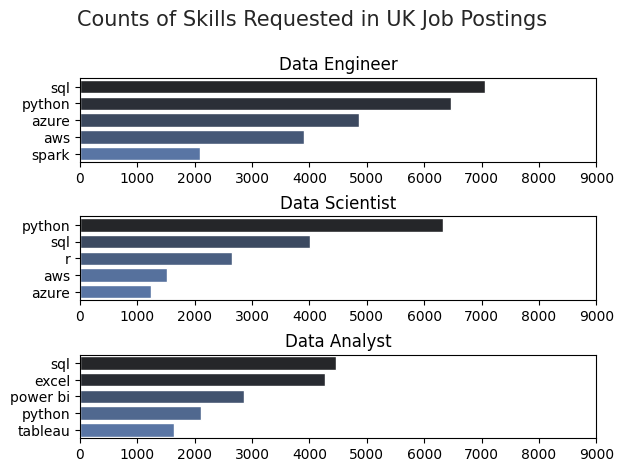

In [ ]:
fig, ax = plt.subplots(len(jt), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(jt):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 9000) # make the scales the same

fig.suptitle('Counts of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

find total counts of job posting by job title

In [ ]:
jtsc = df_uk['job_title_short'].value_counts().reset_index(name='job_total')
jtsc

,job_title_short,job_total
0,Data Engineer,11807
1,Data Analyst,10482
2,Data Scientist,9148
3,Senior Data Engineer,3337
4,Senior Data Scientist,2367
5,Senior Data Analyst,1356
6,Business Analyst,827
7,Software Engineer,541
8,Machine Learning Engineer,317
9,Cloud Engineer,193


Find percentage of jobs requiring skills using total count of job postings


In [ ]:
df_skill_perc = pd.merge(df_skill_count, jtsc, how='left' , on='job_title_short')
df_skill_perc['skill_percent'] = (df_skill_perc['skill_count']/df_skill_perc['job_total'])*100
df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,openstack,Software Engineer,1,541,0.184843
1415,opencv,Software Engineer,1,541,0.184843
1416,opencv,Machine Learning Engineer,1,317,0.315457
1417,objective-c,Data Analyst,1,10482,0.009540


Plot result displaying percentage

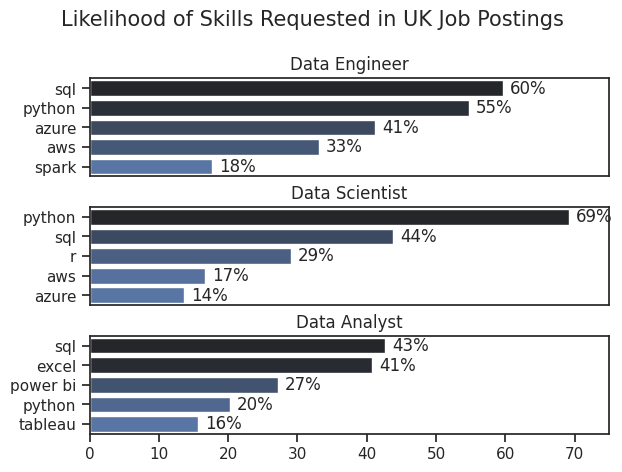

In [ ]:
fig, ax = plt.subplots(len(jt), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(jt):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)
        # remove the x-axis tick labels for better readability
    if i != len(jt) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')


fig.suptitle('Likelihood of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

#End